In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Veri Önişleme

In [ ]:
Veri Önişleme

In [1]:
import os
import pandas as pd

label = []
path = []

fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png':
            if dir_name.split('/')[-1] != 'GT':
                label.append(os.path.split(dir_name)[1])
                path.append(os.path.join(dir_name, filename))

data = pd.DataFrame(columns=['path', 'label'])
data['path'] = path
data['label'] = label

print(data.head())


                                                path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel


Veri görselleştirme

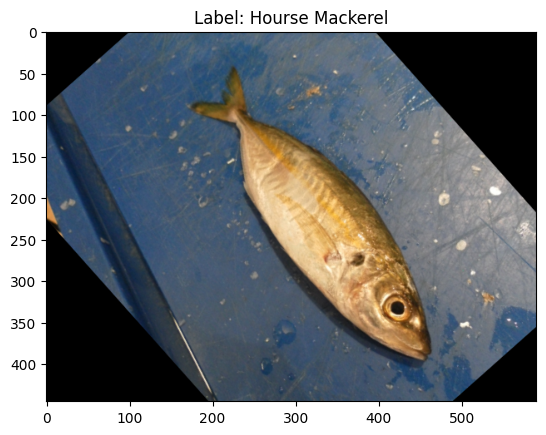

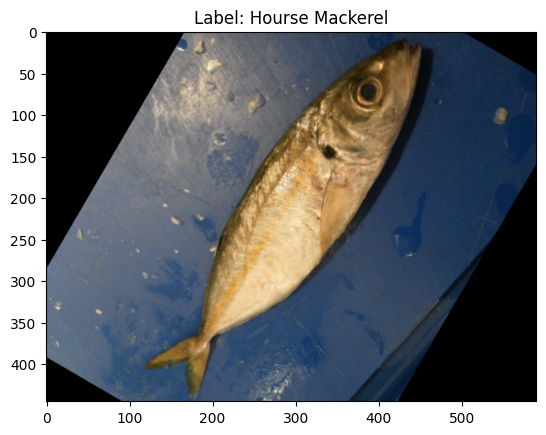

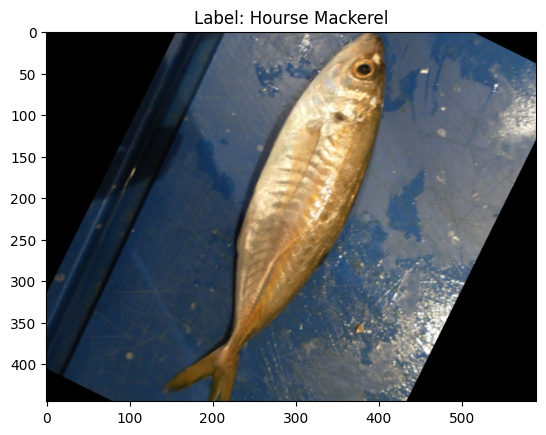

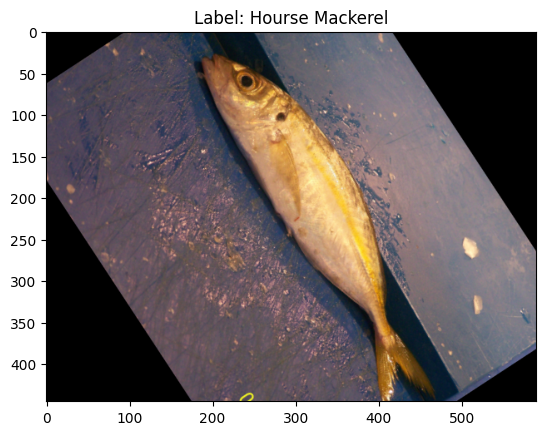

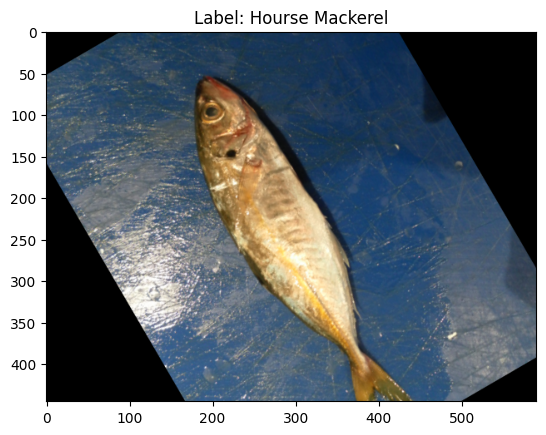

In [2]:
import matplotlib.pyplot as plt
import cv2

# İlk 5 resim ve etiketleri
for i in range(5):
    img = cv2.imread(data['path'][i])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Label: {data['label'][i]}")
    plt.show()

Veri Bölme

In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print(f"Training samples: {len(train_data)}")
print(f"Testing samples: {len(test_data)}")


Training samples: 14400
Testing samples: 3600


Modelin Eğitilmesi

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Model Mimarisi
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Sınıf sayısına göre son katman
])

# Modelin derlenmesi
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 18)             │         1,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,743,954 (14.28 MB)

 Trainable params: 3,743,954 (14.28 MB)

 Non-trainable params: 0 (0.00 B)

Modelin Değerlendirilmesi

Epoch 1/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 669s 2s/step - accuracy: 0.1645 - loss: 2.5141 - val_accuracy: 0.4236 - val_loss: 1.6330
Epoch 2/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 658s 2s/step - accuracy: 0.3320 - loss: 1.7911 - val_accuracy: 0.5333 - val_loss: 1.2522
Epoch 3/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 656s 2s/step - accuracy: 0.4434 - loss: 1.4809 - val_accuracy: 0.6361 - val_loss: 1.0456
Epoch 4/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.4982 - loss: 1.3013 - val_accuracy: 0.6694 - val_loss: 0.9729
Epoch 5/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 664s 2s/step - accuracy: 0.5606 - loss: 1.1401 - val_accuracy: 0.7347 - val_loss: 0.8117
Epoch 6/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 660s 2s/step - accuracy: 0.6032 - loss: 1.0141 - val_accuracy: 0.7792 - val_loss: 0.7027
Epoch 7/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.6363 - loss: 0.9123 - val_accuracy: 0.7889 - val_loss: 0.6533
Epoch 8/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 665s 2s/step - accuracy: 0.6755 - loss: 0.8217 - val_accu

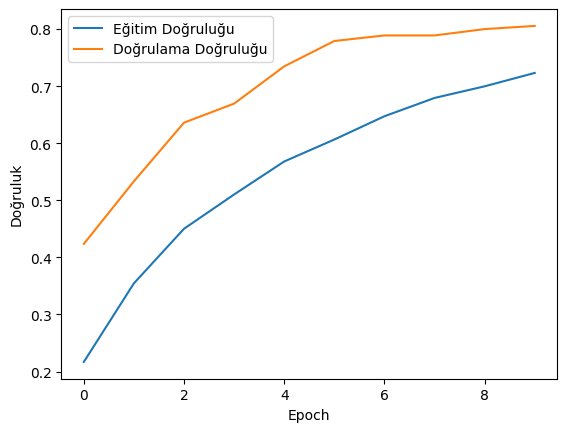

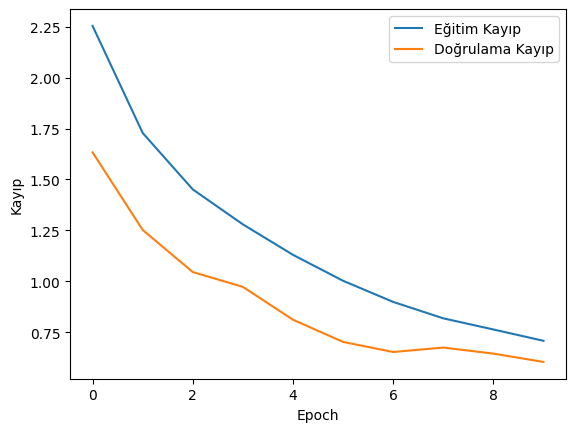

23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 602ms/step
[[3 3 1 3 2 4 3 4 2 1 2 1 4 2 1 3 0 2]
 [4 3 1 3 1 2 2 3 3 3 1 7 2 3 1 2 3 2]
 [6 2 6 3 4 2 4 1 0 1 1 3 2 3 0 0 3 2]
 [1 3 2 4 2 2 1 3 2 1 2 2 3 1 3 1 1 3]
 [2 0 0 4 1 3 5 1 4 2 0 3 1 2 4 4 0 0]
 [0 3 4 1 1 0 0 1 3 2 2 2 3 6 1 0 3 0]
 [4 2 1 1 5 2 0 2 0 5 3 1 6 0 2 1 3 0]
 [4 2 2 4 2 2 4 5 2 7 2 4 2 1 2 0 4 3]
 [2 4 5 5 1 5 1 1 2 2 5 1 0 1 2 0 2 1]
 [3 1 5 1 4 3 4 3 1 4 3 2 2 1 2 2 0 1]
 [5 3 3 4 2 2 2 0 5 1 5 0 3 3 4 2 3 0]
 [3 9 4 4 2 1 1 1 3 1 1 2 2 0 0 1 4 3]
 [2 3 3 3 0 3 2 2 2 1 6 2 0 2 1 1 4 5]
 [2 2 1 0 2 2 1 3 2 2 5 0 3 2 2 1 1 1]
 [2 2 1 2 2 2 2 4 1 3 2 1 1 3 3 1 1 1]
 [0 2 0 1 2 2 2 1 3 1 1 2 0 3 2 1 4 4]
 [2 1 3 2 2 2 1 5 3 2 2 2 4 2 2 2 4 2]
 [0 6 1 0 0 3 3 3 1 0 3 2 4 3 0 2 4 7]]
                       precision    recall  f1-score   support

      Black Sea Sprat       0.07      0.07      0.07        41
   Black Sea Sprat GT       0.06      0.07      0.06        46
      Gilt-Head Bream       0.14      0.14      0.14        43
  

In [12]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)
# Accuracy grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Kayıp (loss) grafiği
plt.plot(history.history['loss'], label='Eğitim Kayıp')
plt.plot(history.history['val_loss'], label='Doğrulama Kayıp')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Test verisi üzerinde tahmin yap
y_pred = np.argmax(model.predict(validation_generator), axis=-1)

# Doğrulama etiketlerini al
y_true = validation_generator.classes

# Confusion matrix ve classification report
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))

